In [120]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import sys
import pickle

def jitterbox(n_legend=4, legend_labels=None, **kwargs):
    'supply x, y, hue, data'
    sns.stripplot(**kwargs, dodge=True, alpha=0.5,zorder=0)
    ax = sns.boxplot(**kwargs, dodge=True, fliersize=0, zorder=10, boxprops = dict(facecolor=(0,0,0,0)))

    handles, labels = ax.get_legend_handles_labels()
    
    if legend_labels is not None:
        assert len(legend_labels)==n_legend
        l = plt.legend(handles[0:n_legend], legend_labels, bbox_to_anchor=(1, 1), frameon=False)

    else:
        l = plt.legend(handles[0:n_legend], labels[0:n_legend], bbox_to_anchor=(1, 1), frameon=False)
    return ax

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [121]:
lst=[]

with open('data.pickle','rb') as f:
    dat = pickle.load(f)

for k in dat.keys():
    for i,arr in enumerate(dat[k]):
        for j, val in enumerate(arr):
            lst.append({'mode':k, 'Model': i+1, 'seed': j, 'pLDDT': val})

with open('data_clusters.pickle','rb') as f:
    dat = pickle.load(f)

for k in dat.keys():
    for i,arr in enumerate(dat[k]):
        for j, val in enumerate(arr):
            lst.append({'mode':k.replace('_ptm_mask',''), 'Model': i+1, 'seed': j, 'pLDDT': val})
                
df = pd.DataFrame.from_records(lst)

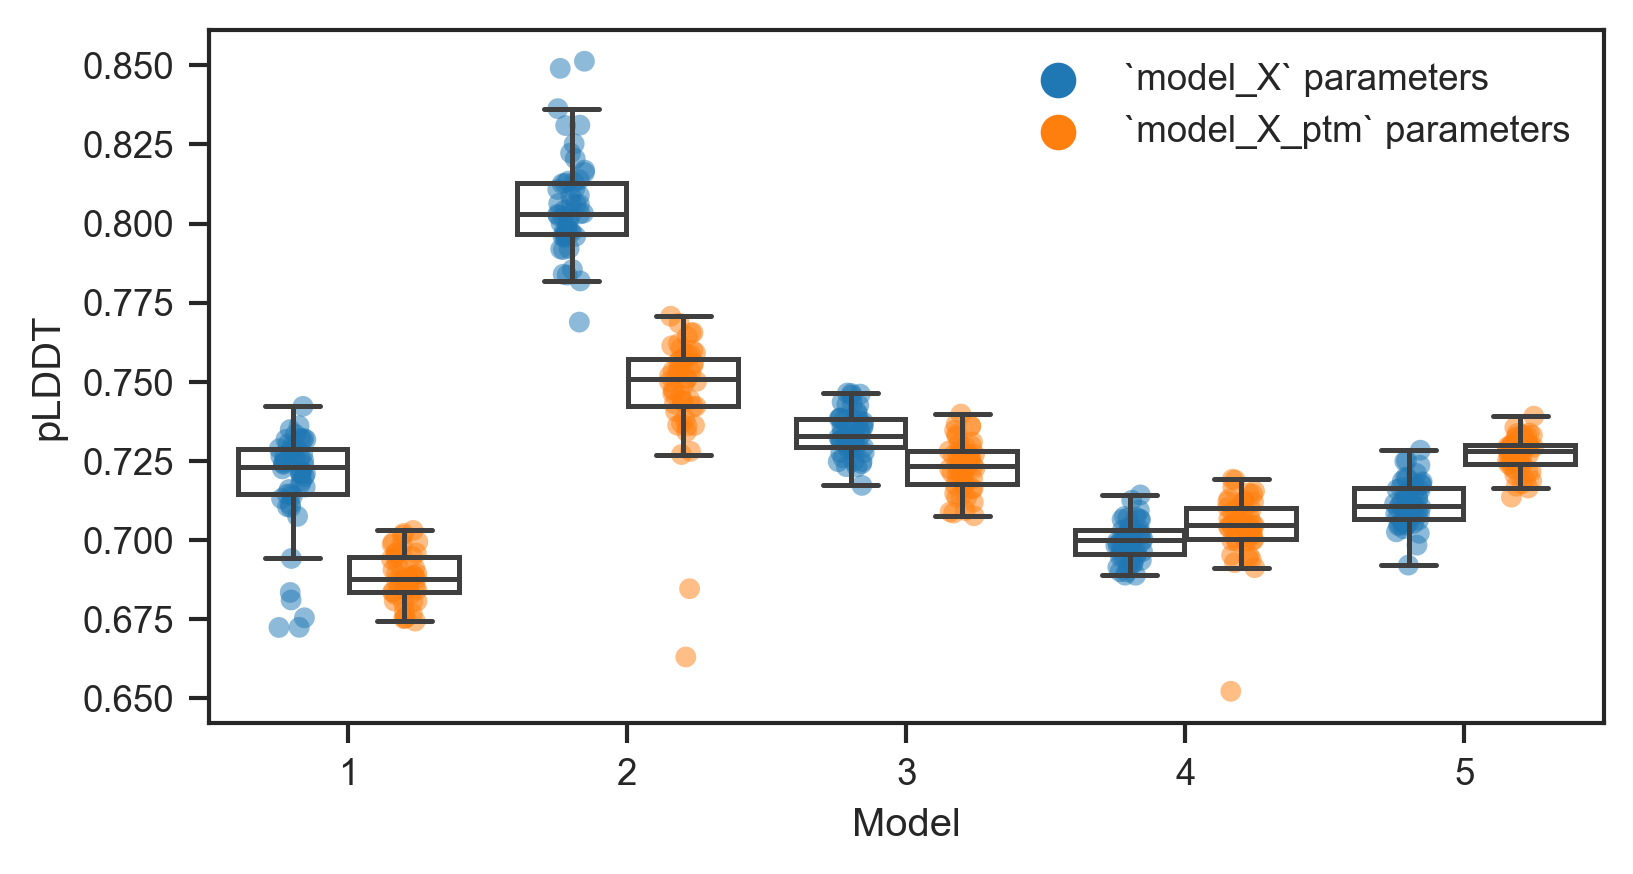

In [122]:
figure(figsize=(6,3))
colors = sns.color_palette('tab20')[:5]
sel = ['noptm_nomask', 'ptm_nomask']

labels = ['`model_X` parameters','`model_X_ptm` parameters']

ax = jitterbox(hue='mode', x='Model',y='pLDDT',data=df, palette=[colors[0],colors[2]],n_legend=len(sel),
               legend_labels=labels,
               hue_order=sel)

savefig('rsp_1.png',dpi=350,bbox_inches='tight')

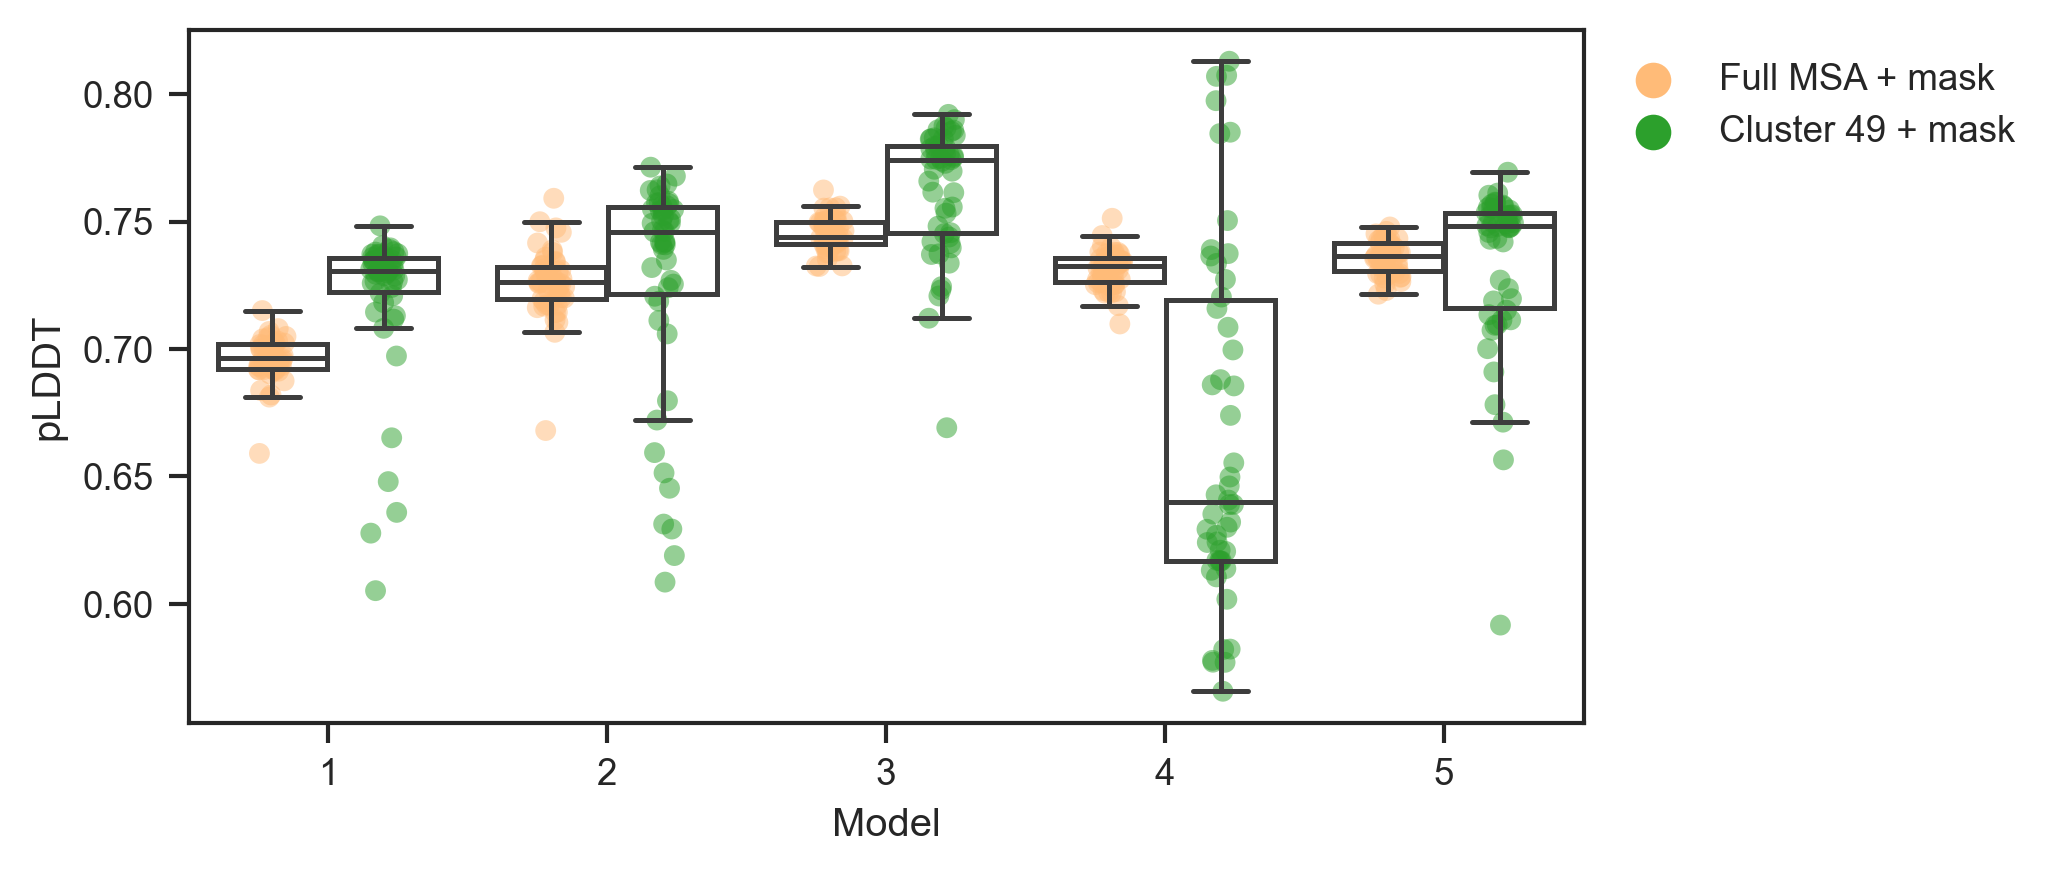

In [118]:
figure(figsize=(6,3))
colors = sns.color_palette('tab20')[:5]
sel = ['ptm_mask',  '49']
labels = ['Full MSA + mask','Cluster 49 + mask']

ax = jitterbox(hue='mode', x='Model',y='pLDDT',data=df, palette=colors[3:],n_legend=len(sel),legend_labels=labels,
               hue_order=sel)

savefig('rsp_2.png',dpi=350,bbox_inches='tight')